# Data management and analysis

## Data management

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"Read in data"
df = pd.read_csv("car_sales_data.csv")

print("Shape:", df.shape)
print("\nColumns & dtypes:\n", df.dtypes)

Shape: (50000, 7)

Columns & dtypes:
 Manufacturer            object
Model                   object
Engine size            float64
Fuel type               object
Year of manufacture      int64
Mileage                  int64
Price                    int64
dtype: object


In [ ]:
"Adding feature"

age = df["Car Age"] = 2022 - df["Year of manufacture"]

'""\ndf["Mileage_per_Year"] = df["Mileage"].div(age)\n\n# Replace any remaining inf with NaN, then fill with total mileage\ndf["Mileage_per_Year"] = (\n    df["Mileage_per_Year"]\n      .replace([np.inf, -np.inf], np.nan)\n      .fillna(df["Mileage"])\n)\n'

In [4]:
"Check duplicates"
print("Total duplicates:", df.duplicated().sum())


duplicates = df[df.duplicated()] #display all duplicate rows
print(duplicates)

Total duplicates: 12
      Manufacturer   Model  Engine size Fuel type  Year of manufacture  \
5426            VW    Polo          1.2    Petrol                 2003   
9862          Ford  Mondeo          1.4    Diesel                 1987   
14745          BMW      Z4          2.4    Petrol                 1999   
19020       Toyota   Yaris          1.0    Petrol                 1996   
19337           VW    Polo          1.0    Petrol                 2000   
23927           VW    Polo          1.2    Petrol                 2021   
25368           VW    Golf          1.2    Diesel                 2011   
28576           VW    Polo          1.2    Petrol                 2003   
34246           VW  Passat          2.0    Diesel                 2003   
35647         Ford   Focus          1.6    Petrol                 2019   
41536           VW  Passat          1.8    Diesel                 1996   
45904         Ford  Fiesta          1.2    Petrol                 2003   

       Mileage  

In [5]:
"Duplicates"

#drop duplicates
df = df.drop_duplicates()

print("After dropping exact duplicates:", df.shape)


After dropping exact duplicates: (49988, 8)


In [6]:
"Check missing values per column"

print("\nMissing values per column:\n", df.isna().sum())

inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum()
print("\nInfinite values per numeric column:\n", inf_counts)

# Combined check (NaN + Inf)
bad_values = df.isna().sum() + np.isinf(df.select_dtypes(include=[np.number])).reindex(df.columns, fill_value=0)
print("\nTotal problematic values (NaN + Inf) per column:\n", bad_values)



Missing values per column:
 Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
Car Age                0
dtype: int64

Infinite values per numeric column:
 Engine size            0
Year of manufacture    0
Mileage                0
Price                  0
Car Age                0
dtype: int64

Total problematic values (NaN + Inf) per column:
                     Car Age Engine size  Fuel type  Manufacturer Mileage  \
Manufacturer              0           0        NaN           NaN       0   
Model                     0           0        NaN           NaN       0   
Engine size               0           0        NaN           NaN       0   
Fuel type                 0           0        NaN           NaN       0   
Year of manufacture       0           0        NaN           NaN       0   
Mileage                   0           0        NaN           NaN       0   

## Data analysis

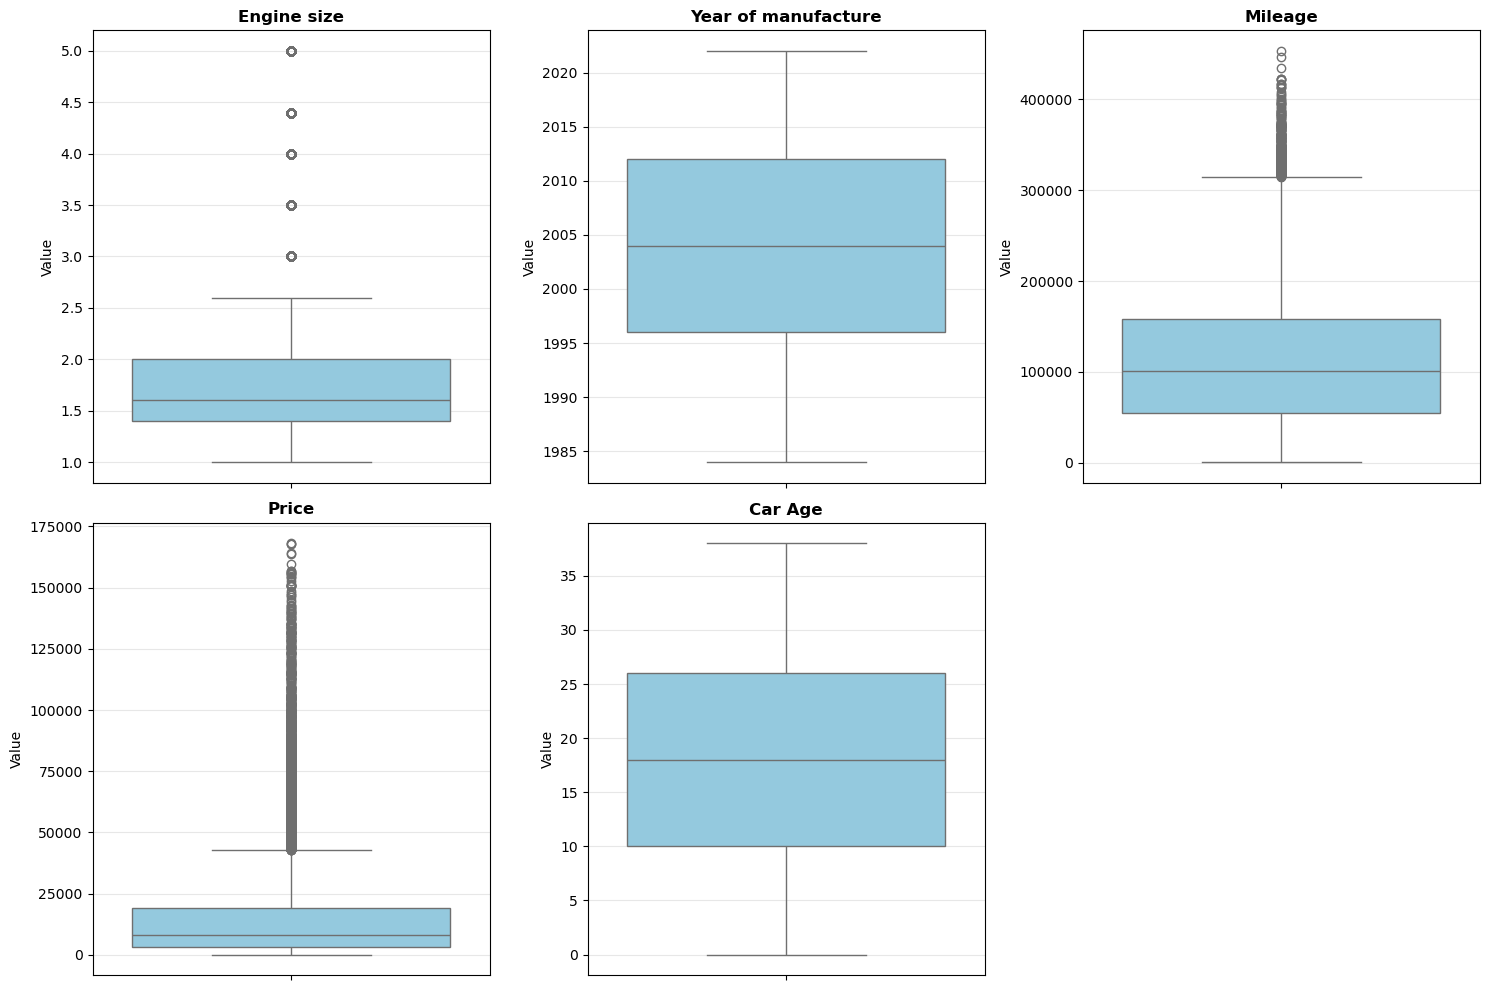

/var/folders/by/bn5byyk92gq6f173m_jc7qym0000gn/T/ipykernel_26831/696987420.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Fuel type', order=df['Fuel type'].value_counts().index, palette='tab10')


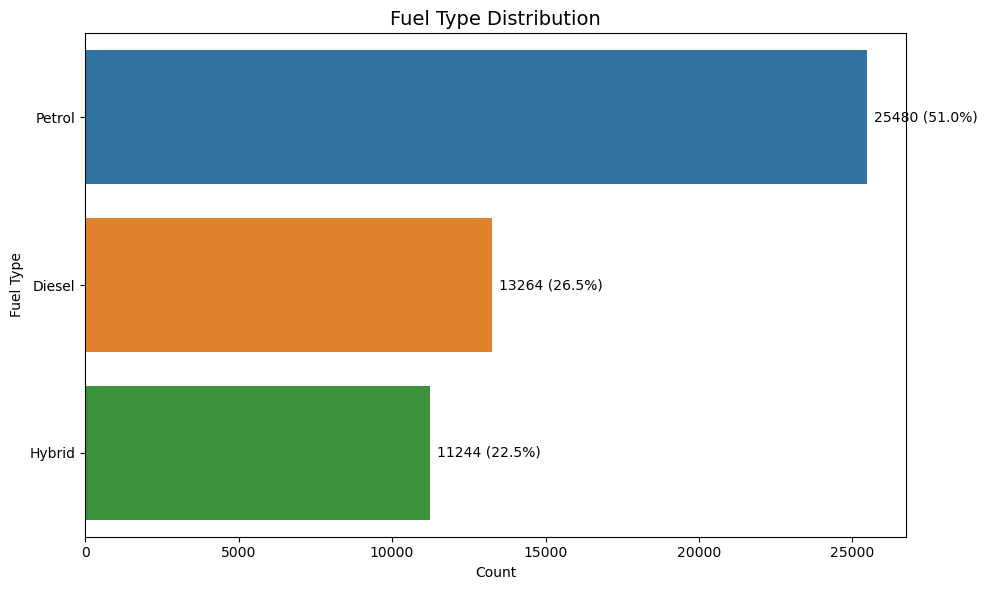

                       Count       Mean       Std      Variance     Min  \
Engine size          49988.0       1.77      0.73  5.400000e-01     1.0   
Year of manufacture  49988.0    2004.21      9.65  9.305000e+01  1984.0   
Mileage              49988.0  112515.56  71624.34  5.130046e+09   630.0   
Price                49988.0   13829.11  16417.81  2.695446e+08    76.0   
Car Age              49988.0      17.79      9.65  9.305000e+01     0.0   

                          Max       25%    Median        75%     Range  
Engine size               5.0      1.40       1.6       2.00       4.0  
Year of manufacture    2022.0   1996.00    2004.0    2012.00      38.0  
Mileage              453537.0  54375.25  101011.5  158617.25  452907.0  
Price                168081.0   3059.75    7971.0   19028.50  168005.0  
Car Age                  38.0     10.00      18.0      26.00      38.0  


In [7]:
"Data exploration"
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Boxplots for each numerical column
n_cols = len(numerical_cols)
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
axes = axes.flatten()
for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)
axes[5].axis('off')
plt.tight_layout()
plt.show()

# Fuel type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Fuel type', order=df['Fuel type'].value_counts().index, palette='tab10')
plt.title('Fuel Type Distribution', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Fuel Type')

# Add count and percentage
for container in plt.gca().containers:
    plt.gca().bar_label(container, labels=[f'{int(v.get_width())} ({v.get_width()/len(df)*100:.1f}%)' for v in container], padding=5)

plt.tight_layout()
plt.show()

# Statistical Summary Table for Numerical Features
stats_dict = {}
for col in numerical_cols:
    stats_dict[col] = {
        'Count': df[col].count(),
        'Mean': df[col].mean(),
        'Std': df[col].std(),
        'Variance': df[col].var(),
        'Min': df[col].min(),
        'Max': df[col].max(),
        '25%': df[col].quantile(0.25),
        'Median': df[col].median(),
        '75%': df[col].quantile(0.75),
        'Max': df[col].max(),
        'Range': df[col].max() - df[col].min(),
    }

# Convert to DataFrame and transpose
stats_df = pd.DataFrame(stats_dict).T
print(stats_df.round(2))

Cars per manufacturer:
              Count  Percentage
Manufacturer                   
Ford          14956       29.92
VW            14906       29.82
Toyota        12553       25.11
BMW            4964        9.93
Porsche        2609        5.22


/var/folders/by/bn5byyk92gq6f173m_jc7qym0000gn/T/ipykernel_26831/238748735.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


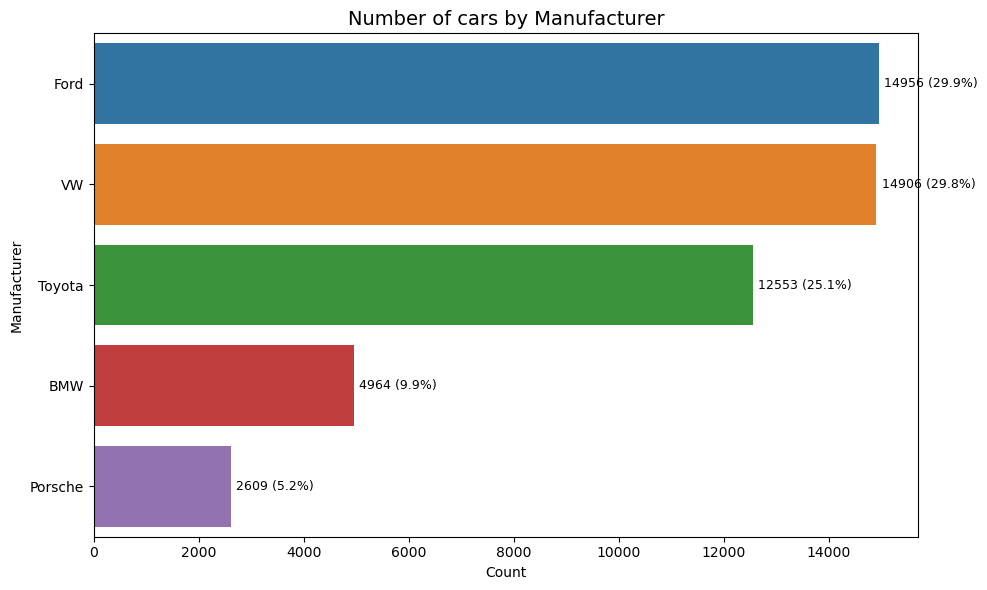

In [ ]:
"Number and percentage of every manufacturer"

# Group by manufacturer and count
counts = df["Manufacturer"].value_counts()

counts_df = counts.rename("Count").to_frame()
counts_df["Percentage"] = (counts_df["Count"] / counts_df["Count"].sum() * 100).round(2)

print("Cars per manufacturer:")
print(counts_df)

#plot
plt.figure(figsize=(10,6))
palette = sns.color_palette("tab10", n_colors=len(counts_df))

sns.barplot(
    y=counts_df.index,
    x=counts_df["Count"],
    palette=palette
)

plt.title("Number of cars by Manufacturer", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Manufacturer")

for i, (count, pct) in enumerate(zip(counts_df["Count"], counts_df["Percentage"])):
    plt.text(count + 100, i, f"{count} ({pct:.1f}%)",
             ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()


Sorted with percentages:

Manufacturer      Model  count  percentage
         BMW         Z4   1687       33.98
         BMW         M5   1645       33.14
         BMW         X3   1632       32.88
        Ford     Mondeo   5057       33.81
        Ford      Focus   4975       33.26
        Ford     Fiesta   4924       32.92
     Porsche        911    872       33.42
     Porsche    Cayenne    870       33.35
     Porsche 718 Cayman    867       33.23
      Toyota       RAV4   4292       34.19
      Toyota      Prius   4171       33.23
      Toyota      Yaris   4090       32.58
          VW       Golf   5049       33.87
          VW       Polo   4988       33.46
          VW     Passat   4869       32.66


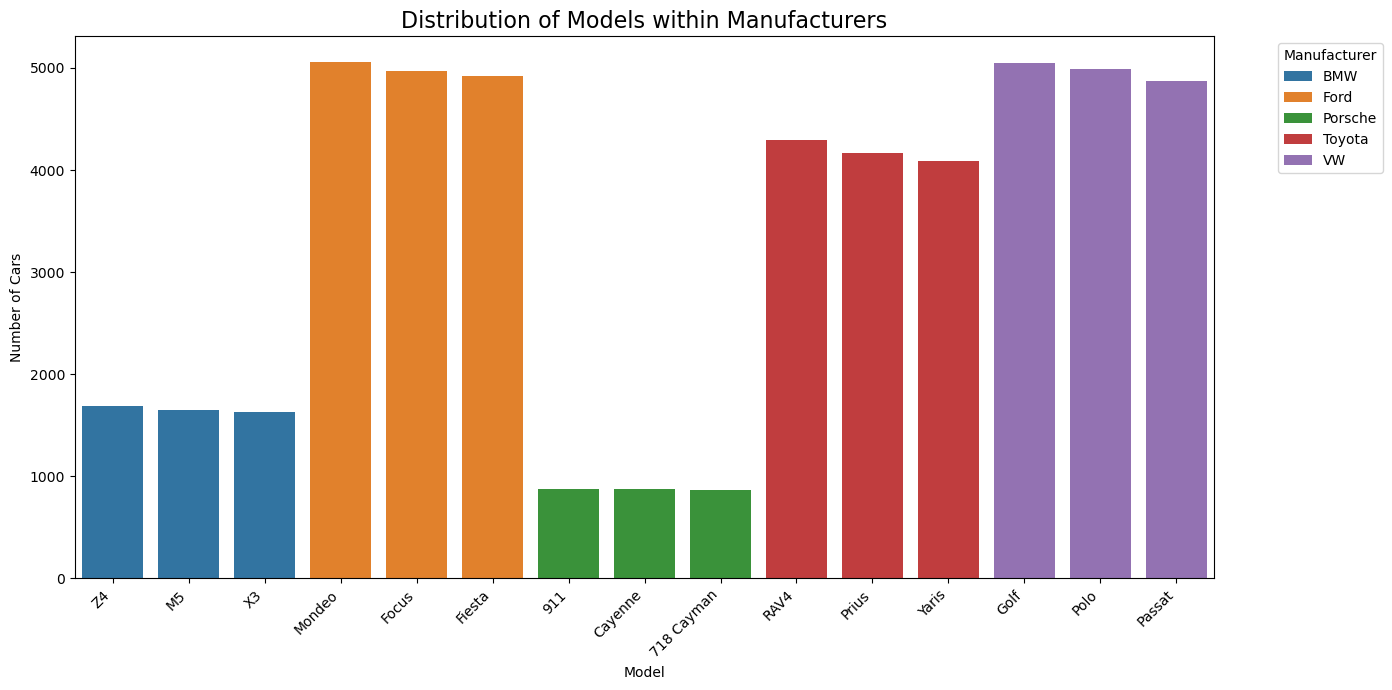

In [ ]:
"Number and percentage of every model"

#Group by Manufacturer and Model
brand_model_counts = (
    df.groupby(["Manufacturer", "Model"])
      .size()
      .reset_index(name="count")
)

brand_model_counts["percentage"] = (
    brand_model_counts
    .groupby("Manufacturer")["count"]
    .transform(lambda x: (x / x.sum() * 100).round(2))
)

#Sort by manufacturer
brand_model_counts = brand_model_counts.sort_values(
    ["Manufacturer", "count"], ascending=[True, False]
).reset_index(drop=True)

print("\nSorted with percentages:\n")
print(brand_model_counts.to_string(index=False))

#Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=brand_model_counts,
    x="Model",
    y="count",
    hue="Manufacturer",
    dodge=False,
    palette="tab10"
)
plt.title("Distribution of Models within Manufacturers", fontsize=16)
plt.ylabel("Number of Cars")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
"Identify numeric and categorical cols"

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Engine size', 'Year of manufacture', 'Mileage', 'Price', 'Car Age']
Categorical columns: ['Manufacturer', 'Model', 'Fuel type']


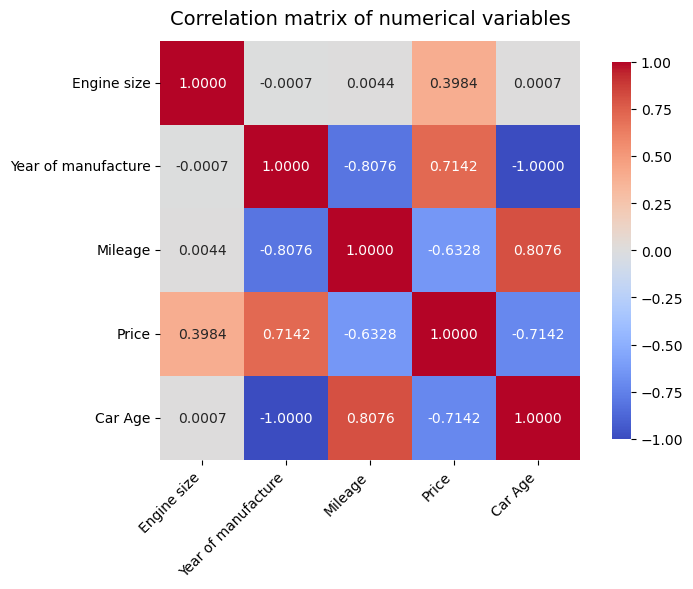

In [ ]:
"Correlation matrix of numerical fuetures"

# Only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute correlation without rounding first
corr = numeric_cols.corr(method="pearson")

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr,
    annot=True, fmt=".4f", 
    cmap="coolwarm", vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.9}
)
ax.set_title("Correlation matrix of numerical variables", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

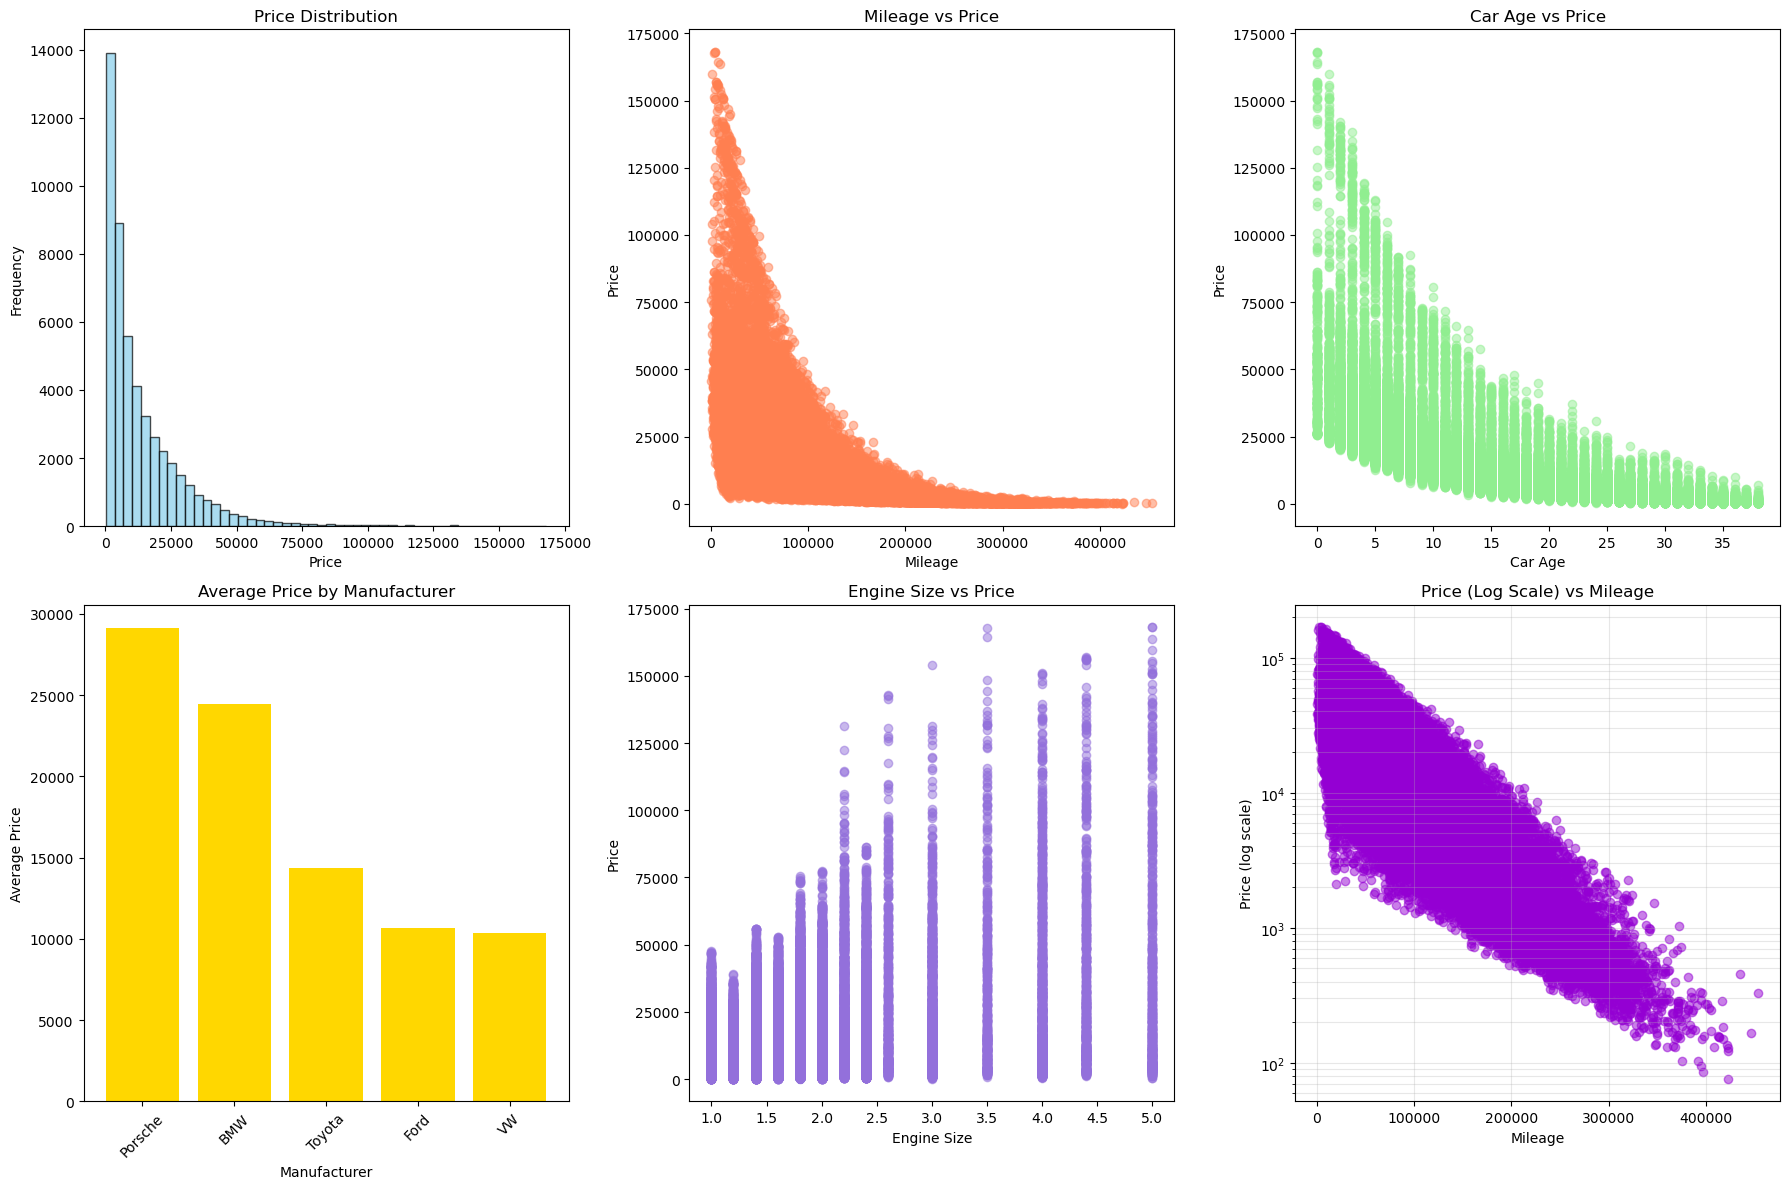

In [12]:
"Visualizations"

# Setup 
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price distribution
axes[0, 0].hist(df['Price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Mileage vs Price
axes[0, 1].scatter(df['Mileage'], df['Price'], alpha=0.5, color='coral')
axes[0, 1].set_title('Mileage vs Price')
axes[0, 1].set_xlabel('Mileage')
axes[0, 1].set_ylabel('Price')

# Car Age vs Price
axes[0, 2].scatter(df['Car Age'], df['Price'], alpha=0.5, color='lightgreen')
axes[0, 2].set_title('Car Age vs Price')
axes[0, 2].set_xlabel('Car Age')
axes[0, 2].set_ylabel('Price')

# Price by Manufacturer
manufacturer_prices = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(manufacturer_prices)), manufacturer_prices.values, color='gold')
axes[1, 0].set_title('Average Price by Manufacturer')
axes[1, 0].set_xlabel('Manufacturer')
axes[1, 0].set_ylabel('Average Price')
axes[1, 0].set_xticks(range(len(manufacturer_prices)))
axes[1, 0].set_xticklabels(manufacturer_prices.index, rotation=45)

# Engine Size vs Price
axes[1, 1].scatter(df['Engine size'], df['Price'], alpha=0.5, color='mediumpurple')
axes[1, 1].set_title('Engine Size vs Price')
axes[1, 1].set_xlabel('Engine Size')
axes[1, 1].set_ylabel('Price')

# Price (log scale) vs Mileage
plot_df = df[["Mileage", "Price"]].dropna()
plot_df = plot_df[(plot_df["Mileage"] > 0) & (plot_df["Price"] > 0)]  # log-safe
axes[1, 2].scatter(plot_df["Mileage"], plot_df["Price"], alpha=0.5, color='darkviolet')
axes[1, 2].set_yscale("log")
axes[1, 2].set_xlabel("Mileage")
axes[1, 2].set_ylabel("Price (log scale)")
axes[1, 2].set_title("Price (Log Scale) vs Mileage")
axes[1, 2].grid(True, which="both", alpha=0.3)

plt.tight_layout()
plt.show()


/var/folders/by/bn5byyk92gq6f173m_jc7qym0000gn/T/ipykernel_26831/16198529.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


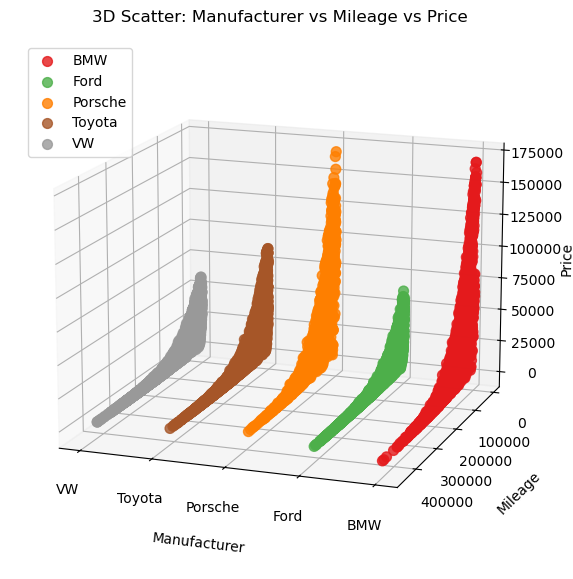

In [ ]:
"3DScatterPlot Price vs Milage vs Manufacturer "
plot_df = df[['Mileage', 'Price', 'Manufacturer']].dropna()
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# X: Manufacturer
x_vals = plot_df['Manufacturer']
cats = pd.Categorical(x_vals)
x = cats.codes
ax.set_xticks(range(len(cats.categories)))
ax.set_xticklabels(cats.categories)

# Y: Mileage
y = plot_df['Mileage'].values

# Z: Price
z = plot_df['Price'].values

# Create color map for different manufacturers
colors = plt.cm.Set1(np.linspace(0, 1, len(cats.categories)))
color_map = {i: colors[i] for i in range(len(cats.categories))}
for i, manufacturer in enumerate(cats.categories):
    mask = x == i
    ax.scatter(x[mask], y[mask], z[mask],
              c=[color_map[i]],
              alpha=0.8,
              label=manufacturer,
              s=50)

# Labels 
ax.set_xlabel('Manufacturer', labelpad=20)
ax.set_ylabel('Mileage', labelpad=20)
ax.set_zlabel('Price', labelpad=11) 

ax.zaxis.set_ticks_position('lower')
ax.zaxis.set_label_position('lower')

ax.view_init(elev=15, azim=110) 

ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
ax.tick_params(axis='z', pad=8) 

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
ax.set_title('3D Scatter: Manufacturer vs Mileage vs Price')
ax.grid(True)
plt.tight_layout(pad=3.0)  
plt.show()

In [ ]:
"Save cleaned dataframe"
df.to_csv("clean_df.csv", index=False) 